<a href="https://colab.research.google.com/github/mehdigreefhorst/Deeplearning-LABS/blob/main/2d-data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diffusion Models in Toy Data

This notebook is designed to provide a comprehensive guide to reproducing the results shown in Figure 1 of the seminal paper, [Deep Unsupervised Learning using
Nonequilibrium Thermodynamics](https://arxiv.org/pdf/1503.03585.pdf). The focus of this notebook is to implement the minimal code required to understand and replicate the toy example results discussed in the paper.

![Image](https://raw.githubusercontent.com/gabrielraya/vanilla-diffusion-model/main/docs/swiss-roll.PNG)


In [1]:
#@title Preparation
import os
import sys
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    !git clone https://github.com/gabrielraya/vanilla-diffusion-model.git
    if (os.getcwd().split("/")[-1] != 'vanilla-diffusion-model'):
        os.chdir("./vanilla-diffusion-model")
else:
    os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

Cloning into 'vanilla-diffusion-model'...
remote: Enumerating objects: 215, done.
remote: Counting objects: 100% (215/215), done.
remote: Compressing objects: 100% (160/160), done.
remote: Total 215 (delta 105), reused 147 (delta 49), pack-reused 0 (from 0)
Receiving objects: 100% (215/215), 38.20 MiB | 17.09 MiB/s, done.
Resolving deltas: 100% (105/105), done.


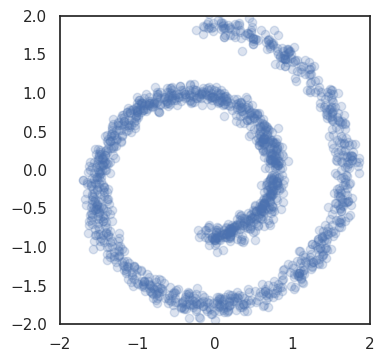

Data shape : (1500, 2)
Data range : -1.9567575591365967 2.0309693066413


In [2]:
#@title Load Libraries and Visualize the Data

import os
import torch
from sklearn.datasets import make_swiss_roll
import matplotlib.pyplot as plt
from diffusion_lib import GaussianDiffusion
from plots import plot_2d
import seaborn as sns
from torch.utils.data import TensorDataset, DataLoader
from tqdm import tqdm
from sampling import AncestralSampling


# Experiment settings
workdir = "./results/swiss/"
sample_dir = os.path.join(workdir, "samples")
os.makedirs(sample_dir, exist_ok=True)

# Generate Swiss Roll data
n_samples = 1500 #@param {"type":"integer"}
x, _ = make_swiss_roll(n_samples, noise=0.5)
x = x[:, [0, 2]]  # Simplify to 2D
trainset = (x - x.mean()) / x.std()  # Normalize data
plot_2d(trainset, workdir, name="swiss_data", w=4, h=4, alpha=0.2, show=True)

print("Data shape :", trainset.shape)
print("Data range :", trainset.min(), trainset.max())

In [3]:
# @title Diffusion Process configuration

# Number of steps in the diffusion process
diffusion_steps = 1000 #@param {"type":"integer"}

# Instantiates the Gaussian diffusion process class
diffusion = GaussianDiffusion(beta_min=0.0001, beta_max=0.020, T=1000)

## **`TODO`**: Noise Schedule

1. **TODO**:  Create a plot of the linear schedule
2. **TODO**:  Create a plot of the cosine schedule
3. **TODO**:  Overlapped the two plots



In [4]:
torch.cumprod(1. - torch.linspace(0.0001, 0.020, 1000), dim=0)

tensor([9.9990e-01, 9.9978e-01, 9.9964e-01, 9.9948e-01, 9.9930e-01, 9.9910e-01,
        9.9888e-01, 9.9864e-01, 9.9838e-01, 9.9811e-01, 9.9781e-01, 9.9749e-01,
        9.9715e-01, 9.9679e-01, 9.9641e-01, 9.9602e-01, 9.9560e-01, 9.9516e-01,
        9.9471e-01, 9.9423e-01, 9.9374e-01, 9.9322e-01, 9.9269e-01, 9.9213e-01,
        9.9156e-01, 9.9097e-01, 9.9035e-01, 9.8972e-01, 9.8907e-01, 9.8840e-01,
        9.8771e-01, 9.8700e-01, 9.8627e-01, 9.8553e-01, 9.8476e-01, 9.8398e-01,
        9.8317e-01, 9.8235e-01, 9.8151e-01, 9.8065e-01, 9.7977e-01, 9.7887e-01,
        9.7795e-01, 9.7702e-01, 9.7606e-01, 9.7509e-01, 9.7410e-01, 9.7309e-01,
        9.7206e-01, 9.7102e-01, 9.6995e-01, 9.6887e-01, 9.6777e-01, 9.6665e-01,
        9.6551e-01, 9.6436e-01, 9.6319e-01, 9.6200e-01, 9.6079e-01, 9.5956e-01,
        9.5832e-01, 9.5706e-01, 9.5578e-01, 9.5449e-01, 9.5318e-01, 9.5185e-01,
        9.5050e-01, 9.4914e-01, 9.4776e-01, 9.4636e-01, 9.4494e-01, 9.4351e-01,
        9.4207e-01, 9.4060e-01, 9.3912e-

In [10]:
torch.cumprod(1. - torch.linspace(0.0001, 0.020, 1000), dim=0)

tensor([9.9990e-01, 9.9978e-01, 9.9964e-01, 9.9948e-01, 9.9930e-01, 9.9910e-01,
        9.9888e-01, 9.9864e-01, 9.9838e-01, 9.9811e-01, 9.9781e-01, 9.9749e-01,
        9.9715e-01, 9.9679e-01, 9.9641e-01, 9.9602e-01, 9.9560e-01, 9.9516e-01,
        9.9471e-01, 9.9423e-01, 9.9374e-01, 9.9322e-01, 9.9269e-01, 9.9213e-01,
        9.9156e-01, 9.9097e-01, 9.9035e-01, 9.8972e-01, 9.8907e-01, 9.8840e-01,
        9.8771e-01, 9.8700e-01, 9.8627e-01, 9.8553e-01, 9.8476e-01, 9.8398e-01,
        9.8317e-01, 9.8235e-01, 9.8151e-01, 9.8065e-01, 9.7977e-01, 9.7887e-01,
        9.7795e-01, 9.7702e-01, 9.7606e-01, 9.7509e-01, 9.7410e-01, 9.7309e-01,
        9.7206e-01, 9.7102e-01, 9.6995e-01, 9.6887e-01, 9.6777e-01, 9.6665e-01,
        9.6551e-01, 9.6436e-01, 9.6319e-01, 9.6200e-01, 9.6079e-01, 9.5956e-01,
        9.5832e-01, 9.5706e-01, 9.5578e-01, 9.5449e-01, 9.5318e-01, 9.5185e-01,
        9.5050e-01, 9.4914e-01, 9.4776e-01, 9.4636e-01, 9.4494e-01, 9.4351e-01,
        9.4207e-01, 9.4060e-01, 9.3912e-

In [7]:
diffusion.alphas_cumprod.numpy()

array([9.99899983e-01, 9.99780059e-01, 9.99640286e-01, 9.99480605e-01,
       9.99300957e-01, 9.99101520e-01, 9.98882174e-01, 9.98642981e-01,
       9.98383999e-01, 9.98105168e-01, 9.97806489e-01, 9.97488081e-01,
       9.97149885e-01, 9.96792018e-01, 9.96414304e-01, 9.96016920e-01,
       9.95599866e-01, 9.95163143e-01, 9.94706869e-01, 9.94230866e-01,
       9.93735313e-01, 9.93220270e-01, 9.92685676e-01, 9.92131591e-01,
       9.91558075e-01, 9.90965068e-01, 9.90352750e-01, 9.89721060e-01,
       9.89070117e-01, 9.88399804e-01, 9.87710297e-01, 9.87001598e-01,
       9.86273766e-01, 9.85526800e-01, 9.84760761e-01, 9.83975708e-01,
       9.83171642e-01, 9.82348740e-01, 9.81506884e-01, 9.80646193e-01,
       9.79766786e-01, 9.78868604e-01, 9.77951765e-01, 9.77016330e-01,
       9.76062238e-01, 9.75089669e-01, 9.74098682e-01, 9.73089278e-01,
       9.72061574e-01, 9.71015573e-01, 9.69951332e-01, 9.68868911e-01,
       9.67768431e-01, 9.66649950e-01, 9.65513468e-01, 9.64359105e-01,
      

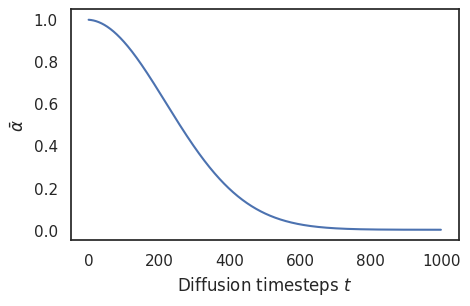

In [5]:
# @title Linear Schedule
alpha_bars_linear = diffusion.alphas_cumprod.numpy()

# Create your plot here
fig = plt.figure(figsize=(5,3))
# Place your code here
plt.plot(alpha_bars_linear)
plt.ylabel(r"$\bar{\alpha}$")
plt.xlabel("Diffusion timesteps $t$")
plt.show()

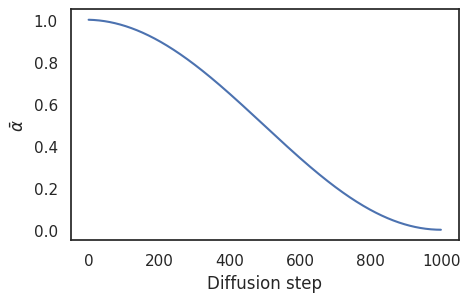

In [6]:
# @title Cosine Schedule
# Set noising variances betas as in Nichol and Dariwal paper (https://arxiv.org/pdf/2102.09672.pdf)
s = 0.008
timesteps = torch.arange(0, diffusion_steps, dtype=torch.float32)
schedule = torch.cos((timesteps / diffusion_steps + s) / (1 + s) * torch.pi / 2)**2

baralphas = schedule / schedule[0]
betas = 1 - baralphas / torch.cat([baralphas[0:1], baralphas[0:-1]])
alphas = 1 - betas

fig = plt.figure(figsize=(5,3))
# Place your code here
#plt.plot( )
plt.plot(baralphas)
plt.xlabel("Diffusion step")
plt.ylabel(r"$\bar{\alpha}$")
plt.show()

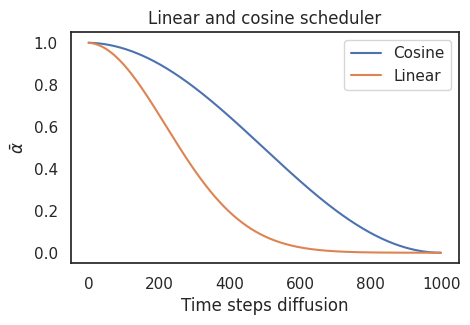

In [12]:
fig = plt.figure(figsize=(5,3))
plt.plot(baralphas)
plt.plot(alpha_bars_linear)
plt.legend(["Cosine", "Linear"])
plt.xlabel("Time steps diffusion")
plt.ylabel(r"$\bar{\alpha}$")
plt.title("Linear and cosine scheduler")
plt.show()

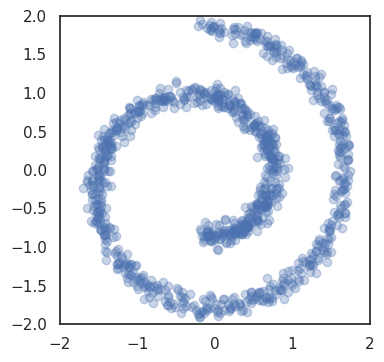

Batch size:  torch.Size([1024, 2])
Data range:  tensor(-1.9086) tensor(1.9439)


In [ ]:
#@title Data loader
dataset = torch.tensor(trainset, dtype=torch.float32)  # Convert to torch tensor

batch_size = 1024  #@param {"type":"integer"}
trainloader = DataLoader(TensorDataset(dataset), batch_size=batch_size, shuffle=True)

batch = next(iter(trainloader))
x = batch[0]
plot_2d(x, workdir, name="swiss_data", w=4, h=4, alpha=0.3, show=True)
print("Batch size: ", x.shape)
print("Data range: ", x.min(), x.max())

## **`TODO`**: Noisy input

- Apply the forward process using the t-step transition distribution to get noisy states at different diffusin times $t$

Time t:  10


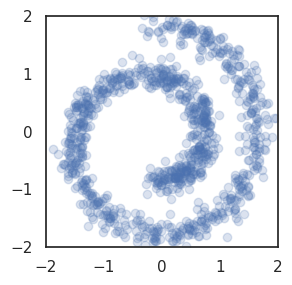

Time t:  50


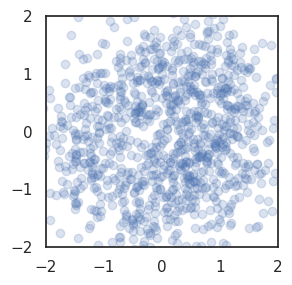

Time t:  100


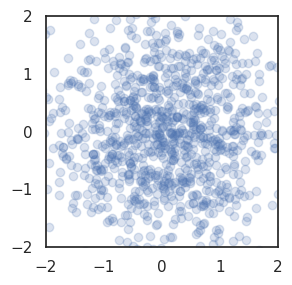

In [ ]:
#@title Noisy Samples

# Instantiates the Gaussian diffusion process class
diffusion = GaussianDiffusion(beta_min=0.0001, beta_max=0.020, T=100)


for t in [9, 49, 99]:
  print("Time t: ", t+1)
  time_steps = torch.ones(x.shape[0]) * t
  # Put your code here (1 line)
  x_t, _ = diffusion. #put here what is missing
  plot_2d(x_t, workdir, name="x_t", w=3, h=3, alpha=0.2, show=True)

In [ ]:
#@title Model Definition

import torch.nn as nn

class DiffusionBlock(nn.Module):
    def __init__(self, nunits):
        super(DiffusionBlock, self).__init__()
        self.linear = nn.Linear(nunits, nunits)

    def forward(self, x: torch.Tensor):
        x = self.linear(x)
        x = nn.functional.relu(x)
        return x


class DiffusionModel(nn.Module):
    def __init__(self, nfeatures: int, nblocks: int = 2, nunits: int = 64):
        super(DiffusionModel, self).__init__()

        self.inblock = nn.Linear(nfeatures+1, nunits)
        self.midblocks = nn.ModuleList([DiffusionBlock(nunits) for _ in range(nblocks)])
        self.outblock = nn.Linear(nunits, nfeatures)

    def forward(self, x: torch.Tensor, t: torch.Tensor) -> torch.Tensor:
        val = torch.hstack([x, t.unsqueeze(1)])  # Add t to inputs
        val = self.inblock(val)
        for midblock in self.midblocks:
            val = midblock(val)
        val = self.outblock(val)
        return val


model = DiffusionModel(nfeatures=2, nblocks=4)

device = "cpu"
model = model.to(device)

model

DiffusionModel(
  (inblock): Linear(in_features=3, out_features=64, bias=True)
  (midblocks): ModuleList(
    (0-3): 4 x DiffusionBlock(
      (linear): Linear(in_features=64, out_features=64, bias=True)
    )
  )
  (outblock): Linear(in_features=64, out_features=2, bias=True)
)

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Todo

Add what is missing in the following training function and discuss how this implements the $L_\text{simple}$ loss

In [ ]:
#@title Train function

def train_model(model, diffusion, trainloader, optimizer, num_epochs=500):
    """
    Train a model using the specified diffusion process and data loader.

    Parameters:
    - model: The model to train.
    - diffusion: The diffusion process instance.
    - trainloader: DataLoader providing training data batches.
    - optimizer: Optimizer to use for training.
    - num_epochs: Number of epochs to train for.

    Returns:
    - List of average training losses per epoch.
    """
    train_losses = []
    for epoch in range(num_epochs):
        model.train()  # Set the model to training mode
        train_loss = 0
        for x in trainloader:
            x = x[0]
            # Generate random time steps for each example in the batch
            time_steps = torch.randint(0, diffusion.T, (x.shape[0],), device=x.device).float()
            # Forward diffusion process to generate noised data and target noise
            x_t, noise = diffusion.t_forward_steps(x, time_steps.long())
            # Model prediction for noise
            predicted_noise = model(, time_steps) # add what is missing
            # Compute mean squared error loss
            loss = torch.mean(torch.square(predicted_noise - noise))
            # Backpropagation
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            train_loss += loss.detach().item()
        # Record and print average loss for the epoch
        avg_train_loss = train_loss / len(trainloader)
        train_losses.append(avg_train_loss)
        if epoch % 20 == 0:
            print(f'Epoch {epoch}, Loss: {avg_train_loss}')

    return train_losses


Epoch 0, Loss: 0.9982257525126139
Epoch 20, Loss: 0.743838389714559
Epoch 40, Loss: 0.6994708736737569
Epoch 60, Loss: 0.6829724431037902
Epoch 80, Loss: 0.6756941199302673
Epoch 100, Loss: 0.6597887396812439
Epoch 120, Loss: 0.6619809707005818
Epoch 140, Loss: 0.660643752415975
Epoch 160, Loss: 0.6424698988596599
Epoch 180, Loss: 0.6319424351056416
Epoch 200, Loss: 0.6227659424146016
Epoch 220, Loss: 0.6290957808494568
Epoch 240, Loss: 0.6318793495496114
Epoch 260, Loss: 0.6386481324831644
Epoch 280, Loss: 0.6250056743621826
Epoch 300, Loss: 0.6371585289637248
Epoch 320, Loss: 0.6365541776021322
Epoch 340, Loss: 0.616666297117869
Epoch 360, Loss: 0.6353983561197917
Epoch 380, Loss: 0.6349393566449483
Epoch 400, Loss: 0.620515787601471
Epoch 420, Loss: 0.6151928702990214
Epoch 440, Loss: 0.6338698983192443
Epoch 460, Loss: 0.6160287102063496
Epoch 480, Loss: 0.6284635742505391


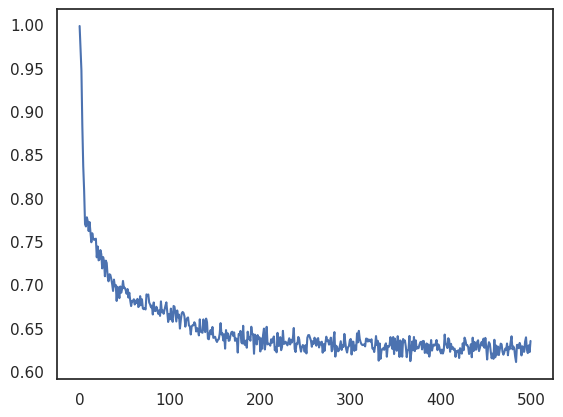

In [ ]:
train_losses = train_model(model, diffusion, trainloader, optimizer, num_epochs=500)

# TODO: plot the losses
plt.plot()

In [ ]:
#@title Sampler

from sampling import AncestralSampling


def perform_sampling(diffusion, model, x_T, device="cpu", sample_shape=(1000, 2)):
    """
    Generate samples using the Ancestral Sampling method with a given model and diffusion process.

    Parameters:
    - diffusion: The diffusion process instance.
    - model: The trained model for denoising.
    - device: The device (CPU or GPU) to perform the sampling on.
    - sample_shape: The shape of the samples to generate.

    Returns:
    - x_mean: The final mean of the samples after the reverse diffusion process.
    """
    model.eval()  # Set the model to evaluation mode
    sampler = AncestralSampling(diffusion, model)

    with torch.no_grad():  # Disable gradient calculation
        # Initial sample - sampling from a tractable prior
        # x = diffusion.prior_sampling(sample_shape).to(device)
        x = x_T.to(device)
        # Reverse time partition [T, 0]
        timesteps = torch.flip(torch.arange(0, diffusion.T, device=device), dims=(0,))

        for i in tqdm(range(diffusion.N)):
            t = torch.ones(sample_shape[0], device=device) * timesteps[i]
            # Update x and get mean using the denoise function from sampler
            x, x_mean = sampler.denoise_update_fn(x, t)

    return x_mean

# todo:
Plot the noise passed to the sampler.

100%|██████████| 100/100 [00:00<00:00, 619.67it/s]


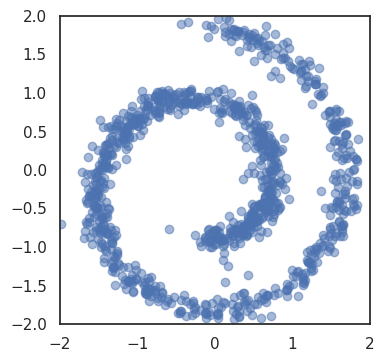

In [ ]:
shape = (1000, 2)
x_T = torch.randn(*shape)

generated_samples = perform_sampling(diffusion, model, x_T, sample_shape=(1000, 2))
plot_2d(generated_samples, workdir, name="generated_swiss_data", w=4, h=4, alpha=0.5, show=True)